Dataset: http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks) 

<b>Data Set Information:</b>

The file "sonar.mines" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.rocks" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

# 1. Import all the necessary files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import os

In [2]:
train_data = pd.read_csv("sonar.all-data",names=range(0,61),header=None)
train_data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [104]:
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [105]:
train_data.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [106]:
train_data.shape

(208, 61)

<b>Observation:</b>
<li>There are 208 rows and 61 columns in the dataset.</li>

In [79]:
train_data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

<b>Observation:</b>
<li>There are 61 columns in the dataset.</li>

# 2. Display the number of missing values(if any) in each of the attributes.

In [80]:
train_data.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
       ...   
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [81]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
0     208 non-null float64
1     208 non-null float64
2     208 non-null float64
3     208 non-null float64
4     208 non-null float64
5     208 non-null float64
6     208 non-null float64
7     208 non-null float64
8     208 non-null float64
9     208 non-null float64
10    208 non-null float64
11    208 non-null float64
12    208 non-null float64
13    208 non-null float64
14    208 non-null float64
15    208 non-null float64
16    208 non-null float64
17    208 non-null float64
18    208 non-null float64
19    208 non-null float64
20    208 non-null float64
21    208 non-null float64
22    208 non-null float64
23    208 non-null float64
24    208 non-null float64
25    208 non-null float64
26    208 non-null float64
27    208 non-null float64
28    208 non-null float64
29    208 non-null float64
30    208 non-null float64
31    208 non-null float64
32    208 non-null float64
33  

<b>Observation:</b>
<li>There are 60 attributes which are of float datatype and 1 attribute is of object datatype.</li>

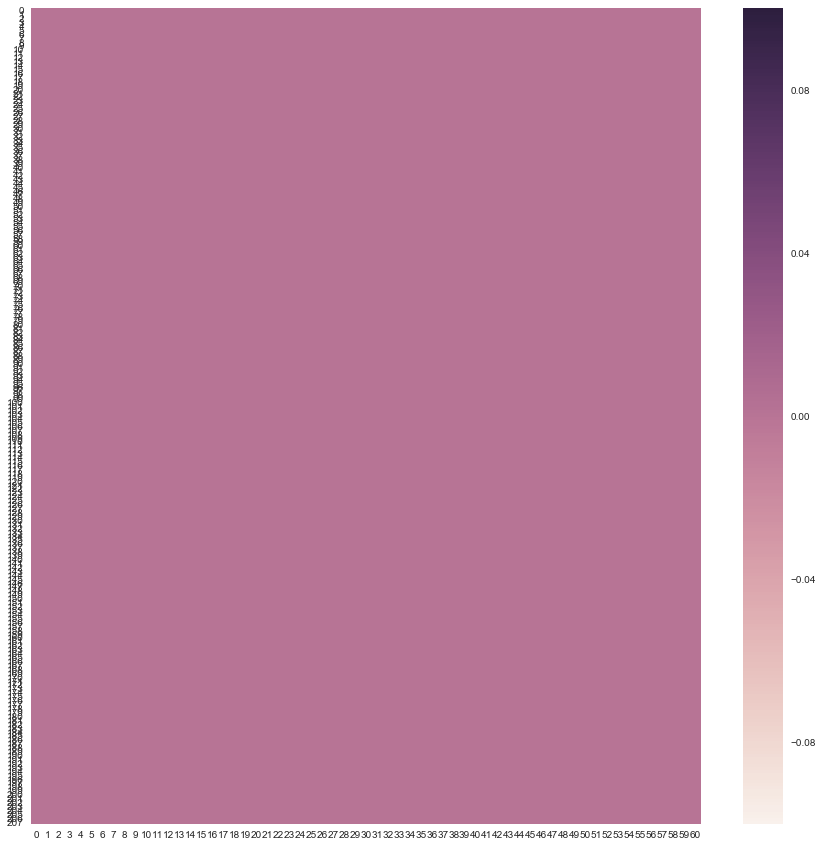

In [36]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(train_data.isnull(), ax=ax)

plt.show()

In [82]:
train_data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<b>Observation:</b>
<li> There are no missing values in the dataset.</li>

<b>Summary Statistics</b>

In [83]:
train_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<b>Observation:</b>
<li> The mean is more than median of some attributes.</li>

# Data Visualization

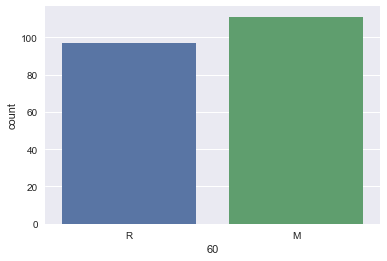

In [46]:
# Check the count of each class in target variable

sns.countplot(x=60,data=train_data)
plt.show()

In [54]:
# Check whether their are outliers present in the dataset or not
from scipy import stats
from scipy.stats import zscore
z = np.abs(stats.zscore(X))
print(z)

[[0.39955135 0.04064823 0.02692565 ... 0.06987027 0.17167808 0.65894689]
 [0.70353822 0.42163039 1.05561832 ... 0.47240644 0.44455424 0.41985233]
 [0.12922901 0.60106749 1.72340448 ... 1.30935987 0.25276128 0.25758223]
 ...
 [1.00438083 0.16007801 0.67384349 ... 0.90652575 0.03913824 0.67887143]
 [0.04953255 0.09539176 0.13480381 ... 0.00759783 0.70402047 0.34015415]
 [0.13794908 0.06497869 0.78861924 ... 0.6738235  0.29860448 0.99479044]]


In [55]:
threshold = 3
print(np.where(z > 3))

(array([  2,   2,   2,   2,   2,   3,   3,   5,   5,  19,  19,  20,  21,
        22,  22,  22,  22,  22,  22,  22,  22,  33,  44,  44,  44,  65,
        85,  85,  87,  91,  91,  97,  97,  98,  98,  98,  98,  98,  98,
       101, 101, 105, 111, 111, 111, 112, 127, 127, 127, 129, 129, 129,
       131, 132, 132, 133, 133, 133, 134, 134, 134, 134, 135, 135, 135,
       135, 136, 136, 136, 136, 137, 137, 138, 138, 138, 140, 140, 140,
       140, 140, 141, 141, 142, 142, 142, 143, 143, 143, 144, 145, 145,
       146, 146, 146, 146, 146, 146, 146, 146, 146, 147, 147, 147, 147,
       147, 147, 147, 147, 161, 184, 186, 186, 186], dtype=int64), array([ 8,  9, 10, 11, 56, 38, 39, 13, 14,  4,  7,  5, 37, 38, 39, 40, 41,
       46, 47, 48, 49, 49, 39, 42, 43, 58,  1,  2, 56,  5,  6, 58, 59,  0,
        1,  2,  3,  4, 59, 12, 57, 55,  2,  3,  4, 57, 13, 54, 57,  0, 12,
       53,  0,  7,  8,  8,  9, 52,  0,  6,  7,  8,  7,  8, 53, 55,  0,  7,
        8, 51,  9, 10,  2, 47, 51, 45, 46, 48, 49, 50, 4

In [56]:
print(z[21][1])

0.5797783445302915


<b>Observation:</b>
<li> The z-score is less than 3.Hence, outlier is not present.</li>

In [14]:
# Lets check skewness of the dataset
train_data.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64

<b>Observations:</b>
<li> The attribute which has skewness > 0 i.e. more weight in the left tail of the distribution.</li>
<li> The attribute which has skewness < 0 i.e. more weight in the right tail of the distribution.</li>

<b>Exploring data Variable<b>

In [3]:
train_data[60].unique()

array(['R', 'M'], dtype=object)

In [4]:
train_data[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

<b>Observation:</b>
<li> Target variable is categorical.</li>

In [6]:
#  return the numpy representation for subsetting 
train_data=train_data.values

In [7]:
train_data

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

<b>Dividing the Dataset into X and Y.</b>

In [17]:
X=train_data[:,0:60].astype(float)
y=train_data[:,60]

Target variable is categorical. We need to encode it to use it with algorithms.

In [18]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=LE.fit_transform(y)

As we can see now, the features are not at all on the same scale. We definitely need to scale them. Here, we are using Standard Scaler.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X= scaler.fit_transform(X)

<b>Splitting the data into train and test into (70:30)</b>

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.30)

In [40]:
def f1_maxscore(m1,X,y):
    f1_maxscore=0
    rs=0
    for r_state in range(42,100):
        X_train,X_test, y_train, y_test= train_test_split(X,y,test_size=0.30, random_state=r_state,stratify=y)
        m1.fit(X_train,y_train)
        y_pred= m1.predict(X_test)
        score=f1_score(y_test,y_pred)
        if score>f1_maxscore:
            f1_maxscore=score
            rs=r_state
    print("Maximum F1_Score is at random_state:",rs," and it is :",round((f1_maxscore),3))

<b>Logistic Regression</b>

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
f1_maxscore(lr,X,y)
predlr= lr.predict(X_test)
score_model1= lr.score(X_test, y_test)
print("The accuracy of the Logistic Model is:",round((score_model1),3))
print(confusion_matrix(y_test,predlr))

Maximum F1_Score is at random_state: 53  and it is : 0.839
The accuracy of the Logistic Model is: 0.905
[[27  4]
 [ 2 30]]


<b>Observations:</b>
<li> There are 27 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 30 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 4 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 2 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [42]:
print(classification_report(y_test,predlr))

             precision    recall  f1-score   support

          0       0.93      0.87      0.90        31
          1       0.88      0.94      0.91        32

avg / total       0.91      0.90      0.90        63



<b>Observation:</b>
<li>we got precision 0.91 and recall 0.90 that means that we got high precision, low recall:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)</li>

In [43]:
from sklearn.model_selection import cross_val_score
mflr=cross_val_score(lr, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(lr, X,y,cv=5,scoring="f1").mean())
mfslr= cross_val_score(lr, X,y,cv=5,scoring="f1").std()
print("standard deviation for logistic from mean f1 score is",cross_val_score(lr, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.600359059004621
standard deviation for logistic from mean f1 score is 0.12006403495059002


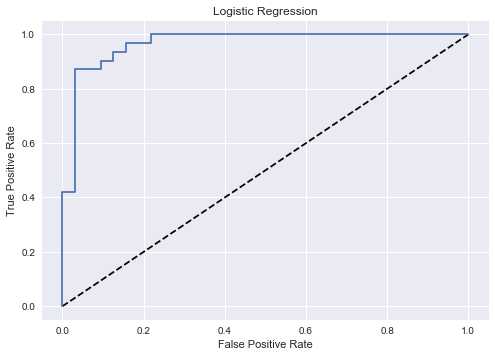

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= lr.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression")
plt.show()

In [45]:
auc_score=roc_auc_score(y_test, lr.predict(X_test))
auc_score

0.904233870967742

<b>K-Nearest Neighbor Classifier</b>

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn= KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
knn1= GridSearchCV(knn, neighbors, cv=5,scoring="f1")
knn1.fit(X,y)
knn1.best_params_

{'n_neighbors': 3}

In [47]:
knn=KNeighborsClassifier(n_neighbors=3)
f1_maxscore(knn,X,y)
predknn= knn.predict(X_test)
score_model2= knn.score(X_test, y_test)
print("The accuracy of the KNN Model is:",round((score_model2),3))
print(confusion_matrix(y_test,predknn))

Maximum F1_Score is at random_state: 94  and it is : 0.893
The accuracy of the KNN Model is: 0.873
[[29  2]
 [ 6 26]]


<b>Observations:</b>
<li> There are 29 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 26 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 2 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 6 observation which are predicted Positive as FP(False Positive) and it is False.</li>

In [48]:
print(classification_report(y_test,predknn))

             precision    recall  f1-score   support

          0       0.83      0.94      0.88        31
          1       0.93      0.81      0.87        32

avg / total       0.88      0.87      0.87        63



<b>Observation:</b>
<li>we got precision 0.88 and recall 0.87 that means that we got high precision, low recall:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)</li>

In [49]:
from sklearn.model_selection import cross_val_score
mfknn=cross_val_score(knn, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(knn, X,y,cv=5,scoring="f1").mean())
mfsknn= cross_val_score(knn, X,y,cv=5,scoring="f1").std()
print("standard deviation for KNN from mean f1 score is",cross_val_score(knn, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.5892054627165234
standard deviation for KNN from mean f1 score is 0.18539457796060815


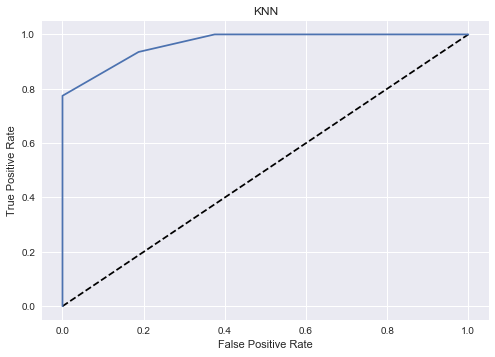

In [62]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= knn.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN")
plt.show()

In [63]:
auc_score=roc_auc_score(y_test, knn.predict(X_test))
auc_score

0.8739919354838711

<b> Decision Tree Classifier</b>

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

f1_maxscore(dt,X,y)
preddt= dt.predict(X_test)
score_model3= dt.score(X_test, y_test)
print("The accuracy of the Decision Tree Model is:",round((score_model3),3))
print(confusion_matrix(y_test,preddt))

Maximum F1_Score is at random_state: 68  and it is : 0.817
The accuracy of the Decision Tree Model is: 0.841
[[23  8]
 [ 2 30]]


<b>Observations:</b>
<li> There are 23 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 30 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 8 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 2 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [65]:
print(classification_report(y_test,preddt))

             precision    recall  f1-score   support

          0       0.92      0.74      0.82        31
          1       0.79      0.94      0.86        32

avg / total       0.85      0.84      0.84        63



<b>Observation:</b>
<li>we got precision 0.85 and recall 0.84 that means that we got high precision, low recall:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)</li>

In [66]:
from sklearn.model_selection import cross_val_score
mfdt=cross_val_score(dt, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(dt, X,y,cv=5,scoring="f1").mean())
mfsdt= cross_val_score(dt, X,y,cv=5,scoring="f1").std()
print("standard deviation for Decision Tree Classifier from mean f1 score is",cross_val_score(dt, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.614991601343785
standard deviation for Decision Tree Classifier from mean f1 score is 0.12159328209054346


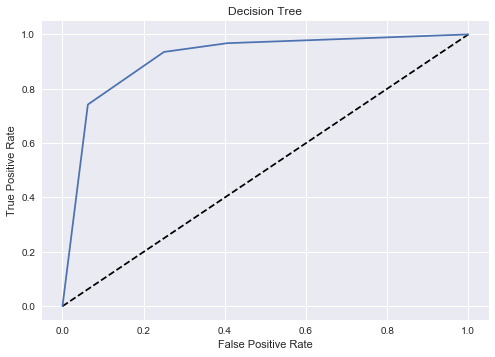

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= dt.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Decision Tree")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree")
plt.show()

In [68]:
auc_score=roc_auc_score(y_test, dt.predict(X_test))
auc_score

0.8397177419354839

<b>Naive Bayes</b>

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
f1_maxscore(nb,X,y)
prednb= nb.predict(X_test)
score_model4= nb.score(X_test, y_test)
print("The accuracy of the Gaussian NB Model is:",round((score_model4),3))
print(confusion_matrix(y_test,prednb))

Maximum F1_Score is at random_state: 95  and it is : 0.8
The accuracy of the Gaussian NB Model is: 0.746
[[19 12]
 [ 4 28]]


<b>Observations:</b>
<li> There are 19 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 28 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 12 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 4 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [70]:
print(classification_report(y_test,prednb))

             precision    recall  f1-score   support

          0       0.83      0.61      0.70        31
          1       0.70      0.88      0.78        32

avg / total       0.76      0.75      0.74        63



<b>Observation:</b>
<li>we got precision 0.76 and recall 0.75 that means that we got high precision, low recall:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)</li>

In [71]:
from sklearn.model_selection import cross_val_score
mfnb=cross_val_score(nb, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(nb, X,y,cv=5,scoring="f1").mean())
mfsnb= cross_val_score(nb, X,y,cv=5,scoring="f1").std()
print("standard deviation for Gaussian NB from mean f1 score is",cross_val_score(nb, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.6749090670409676
standard deviation for Gaussian NB from mean f1 score is 0.19957241489943192


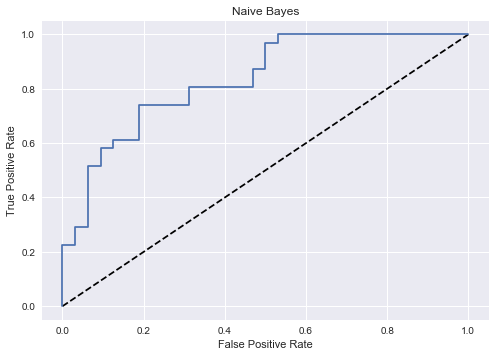

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= nb.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes")
plt.show()

In [73]:
auc_score=roc_auc_score(y_test, nb.predict(X_test))
auc_score

0.7439516129032258

<b>Support Vector Machine</b>

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
sv1 = GridSearchCV(sv, parameters, cv=5,scoring="f1")
sv1.fit(X,y)
sv1.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [80]:
sv=SVC(kernel="linear",C=0.01,probability=True)
f1_maxscore(sv,X,y)
predsv= sv.predict(X_test)
score_model5= sv.score(X_test, y_test)
print("The accuracy of the SVM Model is:",round((score_model5),3))
print(confusion_matrix(y_test,predsv))

Maximum F1_Score is at random_state: 97  and it is : 0.857
The accuracy of the SVM Model is: 0.857
[[26  5]
 [ 4 28]]


<b>Observations:</b>
<li> There are 26 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 28 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 5 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 4 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [81]:
print(classification_report(y_test,predsv))

             precision    recall  f1-score   support

          0       0.87      0.84      0.85        31
          1       0.85      0.88      0.86        32

avg / total       0.86      0.86      0.86        63



<b>Observation:</b>
<li>we got precision 0.86 and recall 0.86 equal.</li>

In [82]:
from sklearn.model_selection import cross_val_score
mfsv=cross_val_score(sv, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(sv, X,y,cv=5,scoring="f1").mean())
mfssv= cross_val_score(sv, X,y,cv=5,scoring="f1").std()
print("standard deviation for SVM from mean f1 score is",cross_val_score(sv, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.6679083588733642
standard deviation for SVM from mean f1 score is 0.1346264147619921


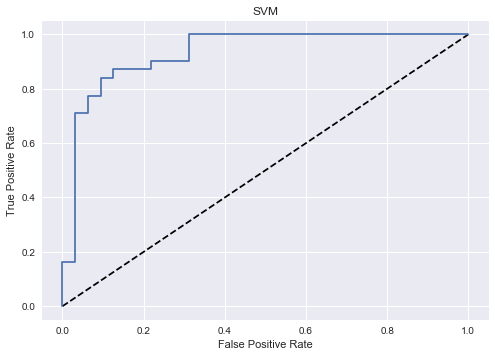

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= sv.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM")
plt.show()

In [84]:
auc_score=roc_auc_score(y_test, sv.predict(X_test))
auc_score

0.8568548387096775

<b>XG Boost Classifier</b>

In [85]:
import xgboost as xgb
from xgboost import XGBClassifier
xg = XGBClassifier()
f1_maxscore(xg,X,y)
predxg= xg.predict(X_test)
score_model6= xg.score(X_test, y_test)
print("The accuracy of the XG Boost Model is:",round((score_model6),3))
print(confusion_matrix(y_test,predxg))

Maximum F1_Score is at random_state: 82  and it is : 0.915
The accuracy of the XG Boost Model is: 0.968
[[30  1]
 [ 1 31]]


<b>Observations:</b>
<li> There are 30 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 31 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 1 observation which is predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 1 observation which is predicted Positive as FP(False Positive) and it is False.</li>

In [86]:
print(classification_report(y_test,predxg))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97        31
          1       0.97      0.97      0.97        32

avg / total       0.97      0.97      0.97        63



<b>Observation:</b>
<li>we got precision 0.97 and recall 0.97.</li>

In [87]:
from sklearn.model_selection import cross_val_score
mfxg=cross_val_score(xg, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(xg, X,y,cv=5,scoring="f1").mean())
mfsxg= cross_val_score(xg, X,y,cv=5,scoring="f1").std()
print("standard deviation for XG Boost from mean f1 score is",cross_val_score(xg, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.7052915354169605
standard deviation for XG Boost from mean f1 score is 0.061348293485012084


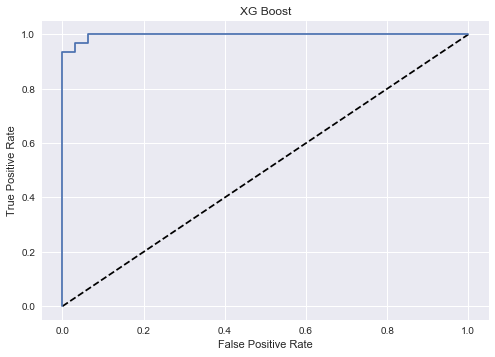

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= xg.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="XG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XG Boost")
plt.show()

In [89]:
auc_score=roc_auc_score(y_test, xg.predict(X_test))
auc_score

0.9682459677419355

# Building ensemble model with Base Model

<b>Bagging</b> <b>(For Decision Tree)</b>

In [90]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(base_estimator=dt, n_estimators=50)

f1_maxscore(bg,X,y)
predbg= bg.predict(X_test)
score_model7= bg.score(X_test, y_test)
print("The accuracy of the Bagging Model is:",round((score_model7),3))
print(confusion_matrix(y_test,predbg))

Maximum F1_Score is at random_state: 99  and it is : 0.909
The accuracy of the Bagging Model is: 0.952
[[30  1]
 [ 2 30]]


<b>Observations:</b>
<li> There are 30 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 30 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 1 observation which is predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 2 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [91]:
print(classification_report(y_test,predbg))

             precision    recall  f1-score   support

          0       0.94      0.97      0.95        31
          1       0.97      0.94      0.95        32

avg / total       0.95      0.95      0.95        63



<b>Observation:</b>
<li> we got precision and recall 0.95 </li>

In [92]:
from sklearn.model_selection import cross_val_score
mfbg=cross_val_score(bg, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(bg, X,y,cv=5,scoring="f1").mean())
mfsbg= cross_val_score(bg, X,y,cv=5,scoring="f1").std()
print("standard deviation for logistic from mean f1 score is",cross_val_score(bg, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.6532114752462843
standard deviation for logistic from mean f1 score is 0.09519863933330563


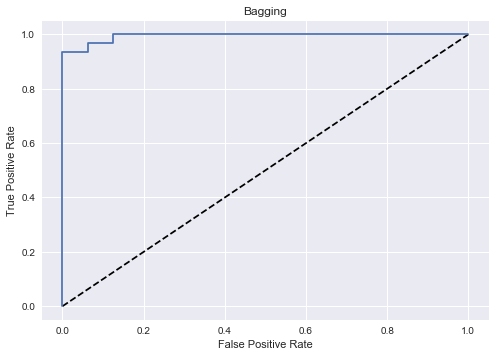

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= bg.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="BG")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Bagging")
plt.show()

In [94]:
auc_score=roc_auc_score(y_test, bg.predict(X_test))
auc_score

0.9526209677419355

<b>Ada Boost Classifier</b>

In [95]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=dt, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
f1_maxscore(ab,X,y)
predab= ab.predict(X_test)
score_model8= ab.score(X_test, y_test)
print("The accuracy of the Ada Boosting Model is:",round((score_model8),3))
print(confusion_matrix(y_test,predab))

Maximum F1_Score is at random_state: 87  and it is : 0.929
The accuracy of the Ada Boosting Model is: 0.937
[[29  2]
 [ 2 30]]


<b>Observations:</b>
<li> There are 29 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 30 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 2 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 2 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [96]:
print(classification_report(y_test,predab))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        31
          1       0.94      0.94      0.94        32

avg / total       0.94      0.94      0.94        63



<b>Observation:</b>
<li> We got precision and recall equal (0.94).</li>

In [97]:
from sklearn.model_selection import cross_val_score
mfab=cross_val_score(ab, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(ab, X,y,cv=5,scoring="f1").mean())
mfsab= cross_val_score(ab, X,y,cv=5,scoring="f1").std()
print("standard deviation for Ada Boosting from mean f1 score is",cross_val_score(ab, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.6601346979377657
standard deviation for Ada Boosting from mean f1 score is 0.10659226150466211


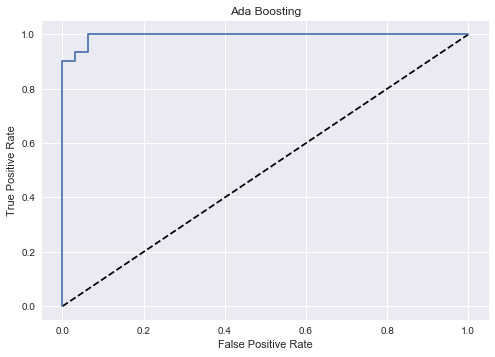

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= ab.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Ada Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ada Boosting")
plt.show()

In [99]:
auc_score=roc_auc_score(y_test, ab.predict(X_test))
auc_score

0.936491935483871

<b>Gradient Boosting Classifier</b>

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.06, max_depth=5)

f1_maxscore(gbcl,X,y)
predgbcl= gbcl.predict(X_test)
score_model9= gbcl.score(X_test, y_test)
print("The accuracy of the Grading Boosting Model is:",round((score_model9),3))
print(confusion_matrix(y_test,predgbcl))

Maximum F1_Score is at random_state: 53  and it is : 0.862
The accuracy of the Grading Boosting Model is: 0.937
[[29  2]
 [ 2 30]]


<b>Observations:</b>
<li> There are 29 observations which are predicted Positive as TP(True Positive) and it is true.</li>
<li> There are 30 observations which are predicted Negative as TN(True Negative) and it is True.</li>
<li> There are 2 observations which are predicted Negative as FN(False Negative) and it is False. </li>
<li> There are 2 observations which are predicted Positive as FP(False Positive) and it is False.</li>

In [102]:
print(classification_report(y_test,predgbcl))

             precision    recall  f1-score   support

          0       0.94      0.94      0.94        31
          1       0.94      0.94      0.94        32

avg / total       0.94      0.94      0.94        63



<b>Observation:</b>
<li> We got Precision and Recall equal(0.94).</li>

In [103]:
from sklearn.model_selection import cross_val_score
mfgbcl=cross_val_score(gbcl, X,y,cv=5,scoring="f1").mean()
print("Mean F1 Score after cross validation", cross_val_score(gbcl, X,y,cv=5,scoring="f1").mean())
mfsgbcl= cross_val_score(gbcl, X,y,cv=5,scoring="f1").std()
print("standard deviation for Gradient  Boosting from mean f1 score is",cross_val_score(gbcl, X,y,cv=5,scoring="f1").std())

Mean F1 Score after cross validation 0.608282566767258
standard deviation for Gradient  Boosting from mean f1 score is 0.07880020822965735


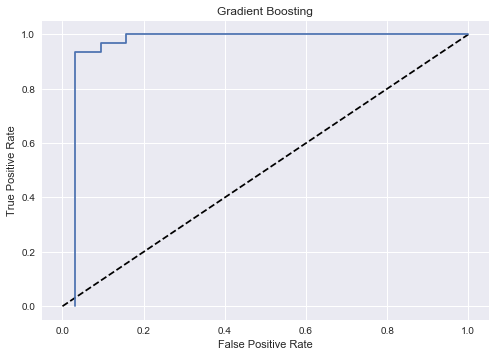

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob= gbcl.predict_proba(X_test)[:,0]
tpr,fpr, thresholds= roc_curve(y_test, y_pred_prob)


# Plot
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting")
plt.show()

In [105]:
auc_score=roc_auc_score(y_test, gbcl.predict(X_test))
auc_score

0.936491935483871

In [107]:
#Lets initialise the data frame with columns model and f1_score
data1= [["Logistic Regression", score_model1, mflr, mfslr], ["KNN", score_model2,mfknn, mfsknn],["Decision Tree", score_model3, mfdt, mfsdt],["Naive Bayes", score_model4,mfnb,mfsnb],["SVM",score_model5,mfsv,mfssv],["XG Boost", score_model6, mfxg,mfsxg],["Bagging",score_model7,mfbg,mfsbg],["Ada Boost", score_model8,mfab,mfsab],["Gradient Boosting",score_model9,mfgbcl,mfsgbcl]]
compare_data= pd.DataFrame(data1, columns=["Model Name", "Accuracy","Mean F1 Score"," Std from mean F1 Score"], index=[1,2,3,4,5,6,7,8,9])
compare_data

,Model Name,Accuracy,Mean F1 Score,Std from mean F1 Score
1,Logistic Regression,0.904762,0.600359,0.120064
2,KNN,0.873016,0.589205,0.185395
3,Decision Tree,0.841270,0.612611,0.127169
4,Naive Bayes,0.746032,0.674909,0.199572
5,SVM,0.857143,0.667908,0.134626
6,XG Boost,0.968254,0.705292,0.061348
7,Bagging,0.952381,0.639449,0.119340
8,Ada Boost,0.936508,0.708831,0.135836
9,Gradient Boosting,0.936508,0.594876,0.074880


<b>Observation:</b>
From the above models, XG Boost Classifier performed well among all.
<li> This dataset is not balance i.e ~53% of the observations belongs to group "M" and ~46% of the observations belongs to income group "R".</li>

In [110]:
#Lets save the above model
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(xg, 'sonar_datset_xg.pkl')

['sonar_datset_xg.pkl']